In [62]:
import numpy as np
from numpy import array
import math

import pandas as pd 
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

import tensorflow as tf
import tensorflow.keras.layers as KL

from matplotlib import pyplot

# LOAD DATA (VERSION 3)

In [63]:
input_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/input3.csv', index_col = 0)
input_data.index.name = 'Timestamp (seconds)'
output_data = pd.read_csv (r'C:/Users/Geraldo Wibowo/Desktop/Year 4/FYP/JUPYTER TEST 1/11_5_2020/output3.csv', index_col = 0)
output_data.index.name = 'Timestamp (seconds)'

## Y ENCODED TO 1 ROW

In [85]:
split_columns = 1

output_data2 = np.array(output_data)
# print(output_data2.shape)

Y = list()

for i in range((int(split_columns/2)),output_data2.shape[0], split_columns):
    Y.append(output_data2[i])

Y = array(Y)
# print(Y.shape)

#DECODING Y
# integer encode direction
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
Y = np.reshape(Y,(-1,1))

scaler = MinMaxScaler(feature_range=(0, 0.999))
Y = scaler.fit_transform(Y)
print(Y)

[[0.999 ]
 [0.999 ]
 [0.999 ]
 ...
 [0.4995]
 [0.4995]
 [0.4995]]


C:\Users\Geraldo Wibowo\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [86]:
#Modifying the output_data to, putting to Y in array
#1 0 0 for normal
#0 1 0 for drowsy
#0 0 1 for aggressive

# output_data = np.array(output_data)

# Y = list()

# for i in range(int(output_data.shape[0]/split_columns)):
#    condition = output_data[(i*split_columns)]    
#    behavior = []
#    if(condition=='DROWSY'):
#        behavior = [0,1,0]
#    elif(condition=='AGGRESSIVE'):
#        behavior = [0,0,1]
#    else:
#        behavior = [1,0,0]
    
#    Y.append(behavior)

# Y = array(Y)
# print(Y.shape)

In [87]:
#min max scaler
X = input_data
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(30929, 28)
(30929, 1)


In [88]:
#USE THIS IF MINMAX SCALER IS NOT USED
#X = np.array(X)
#X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
#print(X.shape)

## RESHAPING X

In [89]:
X = np.reshape(X,(int(X.shape[0]/split_columns),split_columns,X.shape[1]))
print(X.shape)

(30929, 1, 28)


## Split Training - Test Data

In [90]:
#SPLITTING TRAINING AND TEST DATA METHOD 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [91]:
#SPLITTING TRAINING AND TEST DATA METHOD 2
#X_train = X[:(int(X.shape[0] * 0.8)),:,:]
#X_test = X[(int(X.shape[0] * 0.8)):,:,:]
print(X_train.shape)
print(X_test.shape)
#Y_train = Y[:(int(Y.shape[0] * 0.8)),:]
#Y_test = Y[(int(Y.shape[0] * 0.8)):,:]
print(Y_train.shape)
print(Y_test.shape)

(24743, 1, 28)
(6186, 1, 28)
(24743, 1)
(6186, 1)


In [92]:
#MAKING SURE DATA TYPE ARE CORRECT
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')

In [55]:
#RESHAPING X_TRAIN
#nsamples, nx, ny = X_train.shape
#X_train2 = X_train.reshape((nsamples,nx*ny))
#THIS NUMBER IS THE INPUT LAYER (23200)
#print(X_train2.shape)

In [56]:
#RESHAPING X_TEST
#nsamples, nx, ny = X_test.shape
#X_test2 = X_test.reshape((nsamples,nx*ny))

# BUILDING MODEL

In [57]:
## Model
inputs = KL.Input(shape=(split_columns, X_train.shape[2]))
print(inputs)

Tensor("input_6:0", shape=(None, 1, 28), dtype=float32)


In [58]:
# For RNN
x = KL.SimpleRNN(100, activation ='relu')(inputs) 
print(x)

Tensor("simple_rnn_5/strided_slice_3:0", shape=(None, 100), dtype=float32)


In [59]:
outputs = KL.Dense(3, activation="softmax")(x)
print(outputs)

Tensor("dense_5/Softmax:0", shape=(None, 3), dtype=float32)


In [60]:
model = tf.keras.models.Model(inputs, outputs)
model.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1, 28)]           0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               12900     
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 303       
Total params: 13,203
Trainable params: 13,203
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["acc"])
history = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
774/774 [==============================] - 1s 965us/step - loss: 0.9872 - acc: 0.4688
Epoch 2/100
774/774 [==============================] - 1s 899us/step - loss: 0.8865 - acc: 0.5431
Epoch 3/100
774/774 [==============================] - 1s 829us/step - loss: 0.8141 - acc: 0.6041
Epoch 4/100
774/774 [==============================] - 1s 836us/step - loss: 0.7682 - acc: 0.6461
Epoch 5/100
774/774 [==============================] - 1s 832us/step - loss: 0.7356 - acc: 0.6682
Epoch 6/100
774/774 [==============================] - 1s 823us/step - loss: 0.7106 - acc: 0.6863
Epoch 7/100
774/774 [==============================] - 1s 867us/step - loss: 0.6907 - acc: 0.6979
Epoch 8/100
774/774 [==============================] - 1s 899us/step - loss: 0.6735 - acc: 0.7092
Epoch 9/100
774/774 [==============================] - 1s 908us/step - loss: 0.6563 - acc: 0.7188
Epoch 10/100
774/774 [==============================] - 1s 899us/step - loss: 0.6416 - acc: 0.7261
Epoch 11/100
774/77

KeyboardInterrupt: 

In [31]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print("Loss: {0} - Acc: {1}".format(test_loss, test_acc))

194/194 [==============================] - 0s 769us/step - loss: 0.4094 - acc: 0.8335
Loss: 0.409440279006958 - Acc: 0.8334949612617493


In [32]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['acc'], label='accuracy')
pyplot.legend()
pyplot.show()

NameError: name 'history' is not defined

# K-FOLD

In [94]:
kf = KFold(n_splits = 5)
list_training_error = []
list_testing_error = []

#MAKING SURE DATA TYPE ARE CORRECT
X_train = np.asarray(X_train).astype('float32')
Y_train = np.asarray(Y_train).astype('float32')



for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    inputs = KL.Input(shape=(split_columns, X_train.shape[2]))
    x = KL.SimpleRNN(100, activation ='relu')(inputs) 
    outputs = KL.Dense(1, activation="softmax")(x)
    model = tf.keras.models.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
    model.fit(X_train, Y_train, epochs=100)
    
    y_train_data_pred = model.predict(X_train)
    y_test_data_pred = model.predict(X_test)
    fold_training_error = mean_absolute_error(y_train, y_train_data_pred) 
    fold_testing_error = mean_absolute_error(y_test, y_test_data_pred)
    list_training_error.append(fold_training_error)
    list_testing_error.append(fold_testing_error)

Epoch 1/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 2/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 3/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 4/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 5/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 6/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 7/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 8/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 9/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 10/100
774/774 [==============================] - 1s 1ms/s

774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 79/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 80/100
774/774 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 81/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 82/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 83/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 84/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 85/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 86/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 87/100
774/774 [==============================] - 1s 1ms/step 

774/774 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00A: 1s - loss: 0.0000
Epoch 56/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 57/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 58/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 59/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 60/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 61/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 62/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 63/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 64/100
774/774 [==========================

774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 33/100
774/774 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 34/100
774/774 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 35/100
774/774 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 36/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 37/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 38/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 39/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 40/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 41/100
774/774 [==============================] - 1s 1ms/step 

774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 10/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 11/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 12/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 13/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 14/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 15/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 16/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 17/100
774/774 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 18/100
774/774 [==============================] - 1s 1ms/step 

774/774 [==============================] - 1s 892us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 87/100
774/774 [==============================] - 1s 925us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 88/100
774/774 [==============================] - 1s 836us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 89/100
774/774 [==============================] - 1s 836us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 90/100
774/774 [==============================] - 1s 838us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 91/100
774/774 [==============================] - 1s 826us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 92/100
774/774 [==============================] - 1s 836us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 93/100
774/774 [==============================] - 1s 857us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 94/100
774/774 [==============================] - 1s 817us/step - loss: 0.0000e+00 - acc: 0.0000e+00
Epoch 95/100
774/774 [============================

ValueError: Data cardinality is ambiguous:
  x sizes: 24744
  y sizes: 24743
Please provide data which shares the same first dimension.

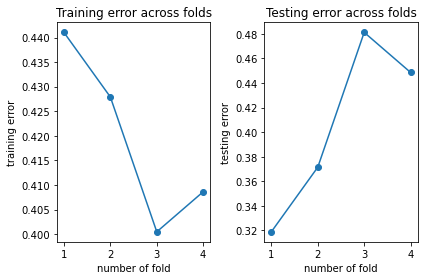

In [97]:
from matplotlib import pyplot as plt
plt.subplot(1,2,1)
plt.plot(range(1, kf.get_n_splits()), np.array(list_training_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('training error')
plt.title('Training error across folds')
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(range(1, kf.get_n_splits()), np.array(list_testing_error).ravel(), 'o-')
plt.xlabel('number of fold')
plt.ylabel('testing error')
plt.title('Testing error across folds')
plt.tight_layout()
plt.show()